In [1]:
#bq clustering
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pydoc import doc
import re 
import os
from collections import Counter
import pandas as pd
from tqdm import tqdm
import numpy as np
import ast

In [2]:
clean_metrics_df = pd.read_csv("data/bigquery_metric_20220526.csv")

In [3]:
#internal metrics are generated now and everything is stored in dataframe should be ready for clustering
target_features = ["comment_density", "snake_case_ratio", "lower_camel_case_ratio", "upper_camel_case_ratio", "func_decorators_avg", "class_decorators_avg",
 "ds_density", "class_parents_ratio"]
target_features = [
    "snake_case_var_ratio", 
    "snake_case_method_ratio",
    "snake_case_class_ratio",
    "upper_camel_case_var_ratio",
    "upper_camel_case_method_ratio",
    "upper_camel_case_class_ratio",
    "lower_camel_case_var_ratio",
    "lower_camel_case_method_ratio",
    "lower_camel_case_class_ratio",
    "func_decorators_avg",
    "class_decorators_avg",
    "class_parents_avg",
    "ds_density",
    "comment_density",
    "comprehensions_avg",
    "generators_avg",
    "lambda_avg",
]
#add generators 

#store params and dataframe for reproducability

#change feature set to store as a different experiment
feature_set = 'feature_set_5'
min_samples = 50
min_cluster_size = 50
cluster_selection_epsilon = 0.05
#get filename and the features


X = clean_metrics_df[target_features].to_numpy()
X = np.nan_to_num(X, nan=0)

print (len(clean_metrics_df))

115050


In [4]:
from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
import seaborn as sns
from sklearn.manifold import TSNE
import pickle

#clustering = DBSCAN(eps=3, min_samples=2)
#clustering.fit_predict(X)


clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, 
                            cluster_selection_epsilon=cluster_selection_epsilon, prediction_data=True).fit(X)
print(len(clusterer.labels_))
with open(f'data/BigQuery/clusters/{feature_set}/full_feature_clusterer.pickle', 'wb') as handle:
    pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)


color_palette = sns.color_palette('Paired', 110000)
print(len(color_palette))

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

#save hyperparams + meta info for experiment
with open(f'data/BigQuery/clusters/{feature_set}/feature_list_params.txt', 'w') as f:
    f.write(f"Hyperparameters: min_samples={min_samples}, min_cluster_size={min_cluster_size}, \
        cluster_selection_epsilon={cluster_selection_epsilon}, prediction_data=True\n")
    f.write("Features:\n")
    for item in target_features:
        f.write(f"{item}\n")
    f.write(f"Full feature cluster count: {len(set(clusterer.labels_))}\n")

In [ ]:
from sklearn.manifold import TSNE
try:
    projection = np.loadtxt(f'data/BigQuery/clusters/feature_set_2/projection.txt')
except:
    projection = TSNE().fit_transform(X)
    np.savetxt(f'data/BigQuery/clusters/{feature_set}/projection.txt', projection)

number of clusters 59
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, -1}


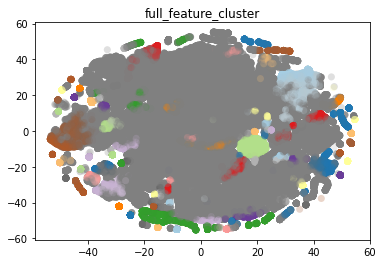

In [ ]:
print ("number of clusters", len(set(clusterer.labels_)))
print (set(clusterer.labels_))
#print (*projection.T)

plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.title("full_feature_cluster")
plt.savefig(f"data/BigQuery/clusters/{feature_set}/plots/full_feature_clusterer.jpg")


X = clean_metrics_df[target_features].to_numpy()
X = np.nan_to_num(X, nan=0)

#clean_metrics_df[target_features].to_csv(f'example_metrics.csv', index=False)

136
snake_case_var_ratio-snake_case_method_ratio_clusterer
number of clusters 27
snake_case_var_ratio-snake_case_class_ratio_clusterer
number of clusters 8
snake_case_var_ratio-upper_camel_case_var_ratio_clusterer
number of clusters 16


KeyboardInterrupt: 

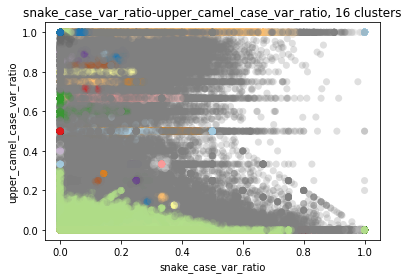

In [ ]:
from itertools import combinations
#clustering = DBSCAN(eps=3, min_samples=2)
#clustering.fit_predict(X)
feature_pairs = list(combinations(target_features, 2))
print (len(feature_pairs))
#feature_pairs = [feature_pairs[0]]
for pair in feature_pairs:
    feat_x = pair[0]
    feat_y = pair[1]
    #feature pair
    feature_pair = clean_metrics_df[list(pair)].to_numpy()
    feature_pair = np.nan_to_num(feature_pair, nan=0)

    clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, 
                cluster_selection_epsilon=cluster_selection_epsilon, prediction_data=True).fit(feature_pair)
    #save clusterer
    with open(f'data/BigQuery/clusters/{feature_set}/{feat_x}-{feat_y}_clusterer.pickle', 'wb') as handle:
        pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)


    color_palette = sns.color_palette('Paired', 110000)
    #print(len(color_palette))

    cluster_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer.labels_]
    cluster_member_colors = [sns.desaturate(x, p) for x, p in
                            zip(cluster_colors, clusterer.probabilities_)]

    print (f"{feat_x}-{feat_y}_clusterer")
    print ("number of clusters", len(set(clusterer.labels_)))
    plt.scatter(*feature_pair.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
    plt.title(f"{feat_x}-{feat_y}, {len(set(clusterer.labels_))} clusters")
    plt.xlabel(f"{feat_x}")
    plt.ylabel(f"{feat_y}")
    plt.savefig(f"data/BigQuery/clusters/{feature_set}/plots/{feat_x}-{feat_y}_clusterer.jpg")